In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


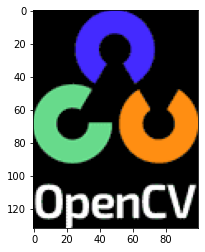

In [8]:
img = cv2.imread("../images/logo.png")
plt.imshow(img)

##  上面的颜色不对是因为没有变化通道，可以看第一章

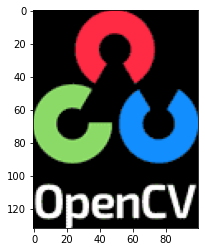

In [9]:
img_new = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_new)

In [11]:
# height, width, channel
height,width,channel = img.shape

In [12]:
print(height,width,channel)

132 100 3


##  1. 图像放大、缩小
cv2.resize()

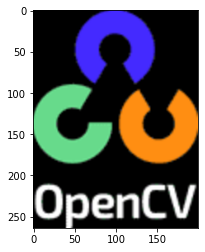

In [13]:
resize_img = cv2.resize(img, (width*2, height*2), interpolation=cv2.INTER_LINEAR)
plt.imshow(resize_img)

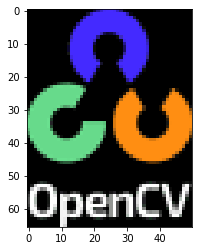

In [14]:
# cv2.resize() # 缩小, 扩大课缩小的两种方式啦 一个是传size的元组，一个是 传fx，fy的比例

small_img = cv2.resize(img, None,fx=0.5,fy=0.5,interpolation=cv2.INTER_LINEAR)
plt.imshow(small_img)

## 2.图像平移

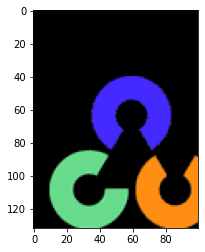

In [20]:

# 1 平移 cv2.warpAffine()
height,width = img.shape[:2]
M1 = np.float32([[1,0,10],[0,1,40]]) # 平移矩阵， 图像向右平移10个像素，向下移动40个像素
move_img = cv2.warpAffine(img, M1,(width,height))
plt.imshow(move_img)

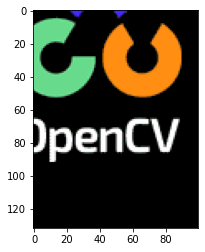

In [21]:
# 1 平移 cv2.warpAffine()
height,width = img.shape[:2]
M1 = np.float32([[1,0,-10],[0,1,-40]]) # 平移矩阵， 图像向左平移10个像素，向上移动40个像素
move_img = cv2.warpAffine(img, M1,(width,height))
plt.imshow(move_img)

## 3. 图像旋转

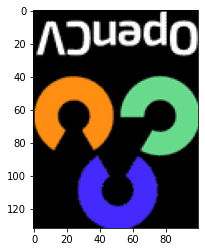

In [22]:
height, width = img.shape[:2]
center = (width//2.0, height//2.0) # 渲染的中心
M3 = cv2.getRotationMatrix2D(center, 180 , 1) # 1 表示旋转过程中没有缩放
rotation_img = cv2.warpAffine(img,M3, (width, height))
plt.imshow(rotation_img)

## 4 图像仿射变换
就是一个图片的拉伸,旋转,扭曲的变化,通过矩阵乘法实现的,就是两个空间矩阵的作用,


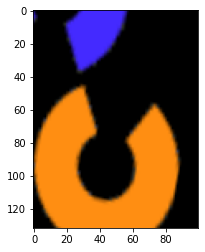

In [23]:
# cv2.getAffineTransform(p1,p2)
p1 = np.float32([[120,35],[215,45],[135,120]])
p2 = np.float32([[135,45],[300,110],[130,230]])
M4 = cv2.getAffineTransform(p1,p2) # 计算一个变换矩阵
trans_img = cv2.warpAffine(img,M4, (width,height))
plt.imshow(trans_img)

## 5.图像的裁剪

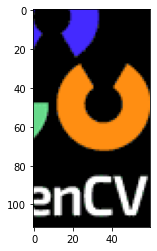

In [25]:
crop_img = img[20:140, 40:200]
plt.imshow(crop_img)

## 6 位运算(AND, OR, XOR)

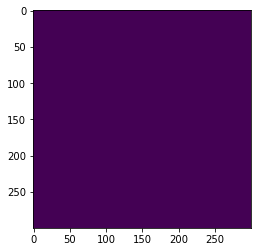

In [30]:
# 长方形
rectangle = np.zeros((300, 300), dtype='uint8')
plt.imshow(rectangle)
# 0 像素点代表黑


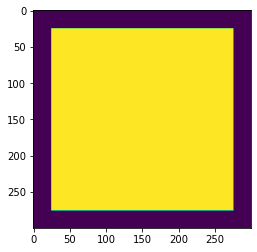

In [38]:
rectangle = np.zeros((300, 300), dtype='uint8')
# 255是填充颜色 ？？ 未知
# -1 是填充的厚度， -1 是完全填充， 10是10像素填充 (25,25) 左上 (275,275) 右下 
rect_img = cv2.rectangle(rectangle,(25,25),(275,275),255,-1)
plt.imshow(rect_img)

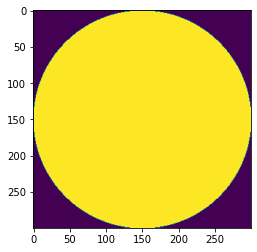

In [48]:
rectangle = np.zeros((300,300), dtype='uint8')
# (150,150) 圆心， 150 半径 255，未知， -1 完全填充
circle_img = cv2.circle(rectangle,(150,150),150,255,-1)
plt.imshow(circle_img)

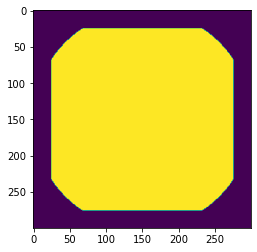

In [49]:
# 与运算：cv2.bitwise_and(), 00:0 01:0, 10:0, 11:1 与运行时同性相吸
and_img = cv2.bitwise_and(rect_img,circle_img)
plt.imshow(and_img)

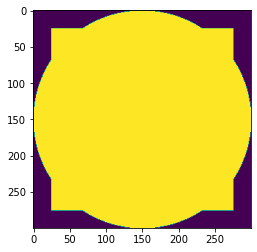

In [50]:
# OR 或运算 01：1， 10：1，00：0， 11：1  有1放行
or_img = cv2.bitwise_or(rect_img, circle_img)
plt.imshow(or_img)


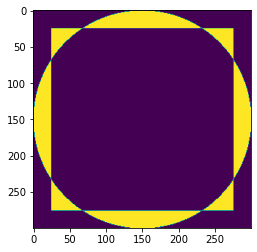

In [51]:
# XOR 抑或运算 01：1 10：1 00：0  11：0 异性相吸
xor_img = cv2.bitwise_xor(rect_img,circle_img)
plt.imshow(xor_img)

## 7 图像的分离和融合


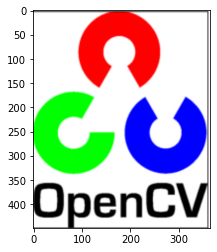

In [65]:
img = cv2.imread("../images/logo1.png")
plt.imshow(img)
B,G,R = cv2.split(img) # 分离

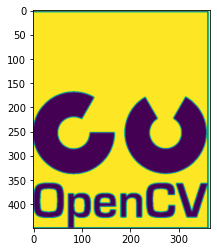

In [66]:
plt.imshow(B) #蓝色

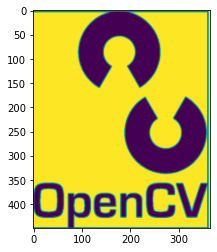

In [67]:
plt.imshow(G) #蓝色

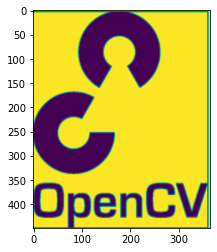

In [68]:
plt.imshow(R)

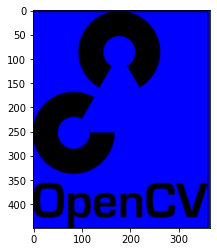

In [70]:
# 2.融合
zeros = np.zeros(img.shape[:2],dtype="uint8")
plt.imshow(cv2.merge([zeros,zeros,R]))

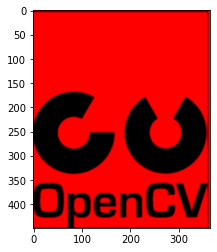

In [63]:
plt.imshow(cv2.merge([B,zeros,zeros]))

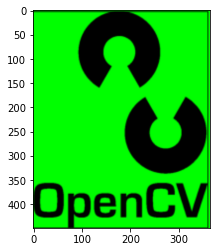

In [64]:
plt.imshow(cv2.merge([zeros,G,zeros]))

## 8 颜色空间 color space

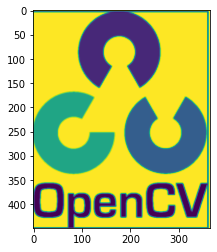

In [71]:
# 灰度
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

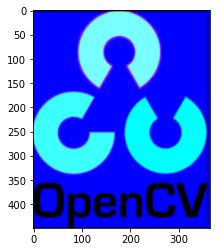

In [72]:
# HSV(色度、饱和度、纯度)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

名称
在开始之前，先明确一下Lab颜色空间（Lab color space）的名字：
- Lab的全称是CIELAB，有时候也写成CIE L*a*b*
- 这里的CIE代表International Commission on Illumination（国际照明委员会），它是一个关于光照、颜色等的国际权威组织。

通道
Lab是由一个亮度通道（channel）和两个颜色通道组成的。在Lab颜色空间中，每个颜色用L、a、b三个数字表示，各个分量的含义是这样的：
- L*代表亮度
- a*代表从绿色到红色的分量
- b*代表从蓝色到黄色的分量

Perceptual uniform
Lab是基于人对颜色的感觉来设计的，更具体地说，它是感知均匀（perceptual uniform）的。Perceptual uniform的意思是，如果数字（即前面提到的L、a、b这三个数）变化的幅度一样，那么它给人带来视觉上的变化幅度也差不多。

Lab相较于RGB与CMYK等颜色空间更符合人类视觉，也更容易调整：想要调节亮度（不考虑Helmholtz–Kohlrausch effect，见下注）就调节L通道，想要调节只色彩平衡就分别调a和b。

注：Helmholtz–Kohlrausch effect是人眼的一种错觉——当色彩饱和度高时，颜色会看起来更亮


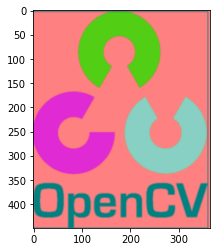

In [74]:
#lab
lab = cv2.cvtColor(img,cv2.COLOR_BGR2Lab)
plt.imshow(lab)